# Trabalho Prático 2 – Aprendizado Não Supervisionado  
## Segmentação de Clientes com Algoritmos de Clusterização

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juniors719/customer_personality_clustering/blob/main/customer_segmentation.ipynb)

### Equipe:
* Francisco Djalma Pereira da Silva Júnior - 554222
* Francisco Leudes Bezerra Neto - 552478
* Pablo Vinícius da Silva Araújo - 574229

### Objetivo:
O objetivo principal deste projeto é aplicar, comparar e avaliar o desempenho de três algoritmos de clusterização distintos a um conjunto de dados real. O processo envolve todas as etapas de um projeto de ciência de dados, desde a exploração e pré-processamento dos dados até a aplicação dos modelos e a interpretação dos resultados. Ao final, buscamos identificar segmentos (clusters) de clientes com perfis e comportamentos semelhantes, que possam ser utilizados para direcionar estratégias de marketing mais eficazes.

### Descrição do Conjunto de Dados:
Para este trabalho, foi selecionado o dataset **"Customer Personality Analysis"**, disponível publicamente na plataforma Kaggle.
* **Fonte:** [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
* **Amostras:** O dataset original contém **2.240** registros de clientes.
* **Características:** Possui **29** atributos (features) que detalham o perfil de cada consumidor em quatro categorias principais:
    * **Pessoas:** Dados demográficos como ano de nascimento, educação, estado civil e renda.
    * **Produtos:** Gastos em diferentes categorias de produtos (vinhos, carnes, frutas, etc.).
    * **Promoções:** Engajamento dos clientes com campanhas de marketing anteriores.
    * **Lugar:** Canais de compra utilizados pelos clientes (loja física, site, catálogo).

Este conjunto de dados é ideal para a tarefa de clusterização, pois não possui rótulos predefinidos (variável alvo), característica típica de problemas de aprendizado não supervisionado. A riqueza de atributos comportamentais e demográficos torna possível a identificação de segmentos relevantes.

### Algoritmos Utilizados

- **K-Means:** Rápido e eficiente para grandes datasets; assume clusters esféricos e de tamanho similar.
- **Hierárquico (Aglomerativo):** Permite análise mais interpretável via dendrograma; não requer definição prévia do número de clusters.
- **DBSCAN:** Identifica clusters de formatos arbitrários e detecta outliers naturalmente.

### Pipeline do Projeto
1. Importação e visualização inicial dos dados
2. Limpeza de dados e engenharia de atributos
3. Análise exploratória e identificação de outliers
4. Pré-processamento (normalização e codificação)
5. Aplicação dos algoritmos de clusterização
6. Avaliação e comparação dos modelos
7. Visualização com PCA e t-SNE
8. Perfilamento e interpretação dos clusters

### Divisão de Tarefas:

| Etapa                                          | Djalma | Leudes | Pablo |
|------------------------------------------------|:------:|:------:|:-----:|
| Escolha do dataset e definição do problema     |   ✔    |   ✔    |   ✔   |
| Importação e visualização inicial dos dados    |        |   ✔    |       |
| Limpeza e engenharia de features               |   ✔    |        |       |
| Análise exploratória e remoção de outliers     |        |        |   ✔   |
| Pré-processamento (encoding e scaling)         |   ✔    |        |   ✔   |
| Modelagem com K-Means                          |   ✔    |        |       |
| Modelagem com Clusterização Hierárquica        |        |   ✔    |       |
| Modelagem com DBSCAN                           |        |        |   ✔   |
| Avaliação dos modelos                          |   ✔    |   ✔    |   ✔   |
| Visualização dos clusters (PCA e t-SNE)        |   ✔    |        |       |
| Conclusão e perfilamento                       |   ✔    |   ✔    |   ✔   |


# Importação de bibliotecas


In [1]:
# Importação das bibliotecas para manipulação de dados, matemática e visualização
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação das ferramentas de Machine Learning do Scikit-learn que serão usadas
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importação de bibliotecas para ajudar com a visualização e avisos
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage

# --- CONFIGURAÇÕES GERAIS ---
# Ignorar avisos de bibliotecas para um output mais limpo
warnings.filterwarnings("ignore")
# Define um estilo visual padrão para os gráficos
sns.set_style("whitegrid")


import missingno as mn

# Leitura do dataset

In [2]:
try:
    # O arquivo 'marketing_campaign.csv' deve estar na mesma pasta que o seu notebook
    url = "https://raw.githubusercontent.com/juniors719/customer_personality_clustering/refs/heads/main/marketing_campaign.csv"
    df = pd.read_csv(url, sep='\t')
    print("--- Dataset Carregado com Sucesso! ---")
    print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print("ERRO: O arquivo 'marketing_campaign.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está na mesma pasta que o seu notebook.")

--- Dataset Carregado com Sucesso! ---
O dataset tem 2240 linhas e 29 colunas.


# Primeira análise do dataset

In [3]:
# 1. Visualização das primeiras linhas do dataset
print("\n--- Visualizando as 5 primeiras linhas do dataset: ---")
display(df.head())


--- Visualizando as 5 primeiras linhas do dataset: ---


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Verificação de Tipos de Dados e Contagem de Nulos

O `.info()` nos dá uma visão rápida sobre os tipos de dados e a presença de valores nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Estatísticas Descritivas (Numéricas)

O `.describe()` resume as principais métricas estatísticas das colunas numéricas.

In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### Contagem de Valores Nulos por Coluna

A presença de dados ausentes é um dos problemas mais comuns em projetos de ciência de dados. É crucial identificá-los e tratá-los corretamente, pois a maioria dos algoritmos de Machine Learning não funciona com valores nulos.

**O Impacto dos Dados Ausentes:**

- **Redução do Poder Estatístico:** A ausência de dados diminui o tamanho da amostra, o que pode enfraquecer os resultados de testes estatísticos e a confiança nos modelos.
- **Viés nos Resultados:** Se os dados não estiverem faltando de forma completamente aleatória, a sua ausência pode introduzir um viés significativo. Por exemplo, se pessoas com renda mais baixa tendem a não informar sua renda, qualquer análise sobre o impacto da renda no consumo será distorcida.
- **Problemas Técnicos:** Como mencionado, algoritmos como k-Means param ou geram erros ao encontrar valores nulos.

Vamos agora visualizar detalhadamente onde estão os nossos dados ausentes.

In [6]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Porcentagem'])

print("\n\n--- Análise de Dados Ausentes por Coluna ---")
missing_values = missing_data(df)
display(missing_values.style.background_gradient(cmap='Reds'))



--- Análise de Dados Ausentes por Coluna ---


,Total,Porcentagem
Income,24,1.071429
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000
MntWines,0,0.000000




--- Matriz de Valores Ausentes ---


<Axes: >

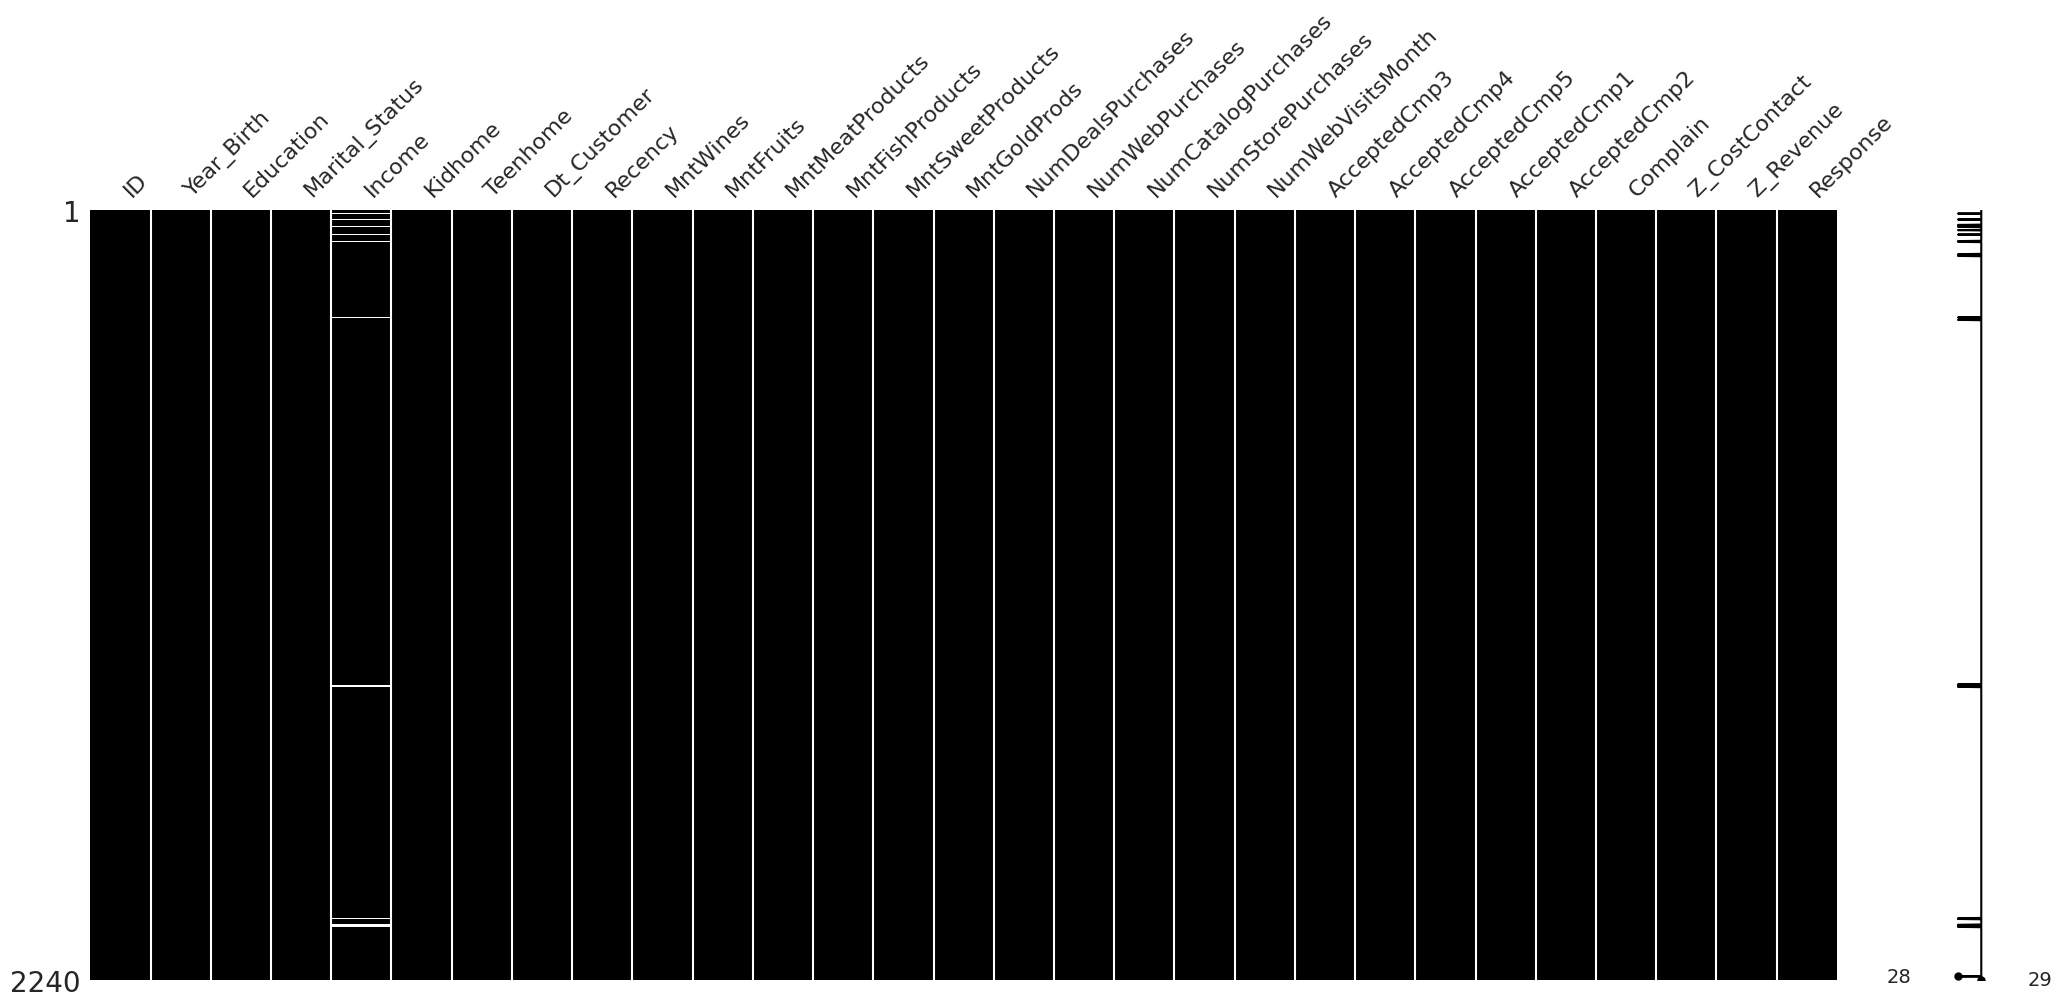

In [7]:
# Visualizar a matriz de valores ausentes
print("\n\n--- Matriz de Valores Ausentes ---")
mn.matrix(df,color = (0,0,0))

###  Verificação de Linhas Duplicadas

In [8]:
num_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas encontradas: {num_duplicados}")

Número de linhas duplicadas encontradas: 0


### Contagem de Valores Únicos (Cardinalidade) por Coluna

O `.nunique()` é essencial para identificar colunas constantes.

In [9]:
display(df.nunique())

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


A análise de cardinalidade revelou que as colunas `Z_CostContact` e `Z_Revenue` possuem apenas **1 valor único**. Elas são constantes e serão removidas na etapa de limpeza por não adicionarem informação útil.

### Conclusão da Análise Diagnóstica

A partir da análise diagnóstica, podemos extrair as seguintes conclusões que guiarão nosso próximo passo:

* **Estrutura Confirmada:** O dataset possui **2240 linhas** e **29 colunas**.
* **Dados Ausentes Identificados:** O diagnóstico confirma que a única coluna com valores faltantes é a `Income`, com **24 registros nulos**.
* **Sem Duplicatas:** Não há linhas duplicadas no dataset.
* **Colunas Constantes:** As colunas `Z_CostContact` e `Z_Revenue` possuem apenas um valor único, indicando que não contribuem com informação útil para a clusterização. Elas serão removidas na etapa de limpeza.
* **Necessidade de Pré-processamento:** O dataset contém uma mistura de tipos de dados (numéricos e de texto) que exigirá tratamento (normalização e codificação) antes da modelagem.

# Data Cleaning

In [10]:
df_clean = df.copy()

### Preenchimento de Dados Ausentes

Para lidar com os dados ausentes, uma abordagem comum é preencher os valores nulos com a mediana da coluna correspondente. Isso é especialmente útil para colunas numéricas, como a `Income`, onde a média pode fornecer uma estimativa razoável do valor ausente sem introduzir viés significativo.

In [11]:
income_median = df_clean['Income'].median()
df_clean['Income'].fillna(income_median, inplace=True)
print(f"Valores nulos em 'Income' após imputação: {df_clean['Income'].isnull().sum()}")

Valores nulos em 'Income' após imputação: 0


### Engenharia de Features
A engenharia de features é uma etapa crucial no pré-processamento de dados, onde transformamos e criamos novas variáveis a partir das existentes para melhorar o desempenho dos modelos de Machine Learning.

* **`Idade`**: É uma variável demográfica muito mais intuitiva e diretamente interpretável do que o ano de nascimento.
* **`Gasto_Total`**: Consolida todos os gastos em uma única métrica poderosa que representa o valor total de compra de cada cliente.
* **`Tempo_de_Cliente_dias`**: Mede a longevidade do relacionamento do cliente com a empresa, um excelente indicador de lealdade.
* **`Total_Filhos`** e **`Possui_Filhos`**: Simplificam a estrutura familiar, permitindo analisar de forma direta e eficaz as diferenças de comportamento entre clientes que são pais e os que não são.

In [12]:
# CRIAÇÃO DE FEATURES

# Criação da Feature 'Age' a partir do ano de nascimento
df_clean['Age'] = 2025 - df_clean['Year_Birth']

# Criação da Feature 'Total_Spent' que soma os gastos em diferentes categorias
df_clean['Total_Spent'] = df_clean[[col for col in df.columns if 'Mnt' in col]].sum(axis=1)

# Conversão da coluna 'Dt_Customer' para o formato datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], dayfirst=True)

# Criação da Feature 'Customer_Tenure' que calcula o tempo de relacionamento com o cliente
df_clean['Customer_Tenure'] = (pd.to_datetime('2025-07-06') - df_clean['Dt_Customer']).dt.days # Usando a data da entrega

# Criação da Feature 'Children' que soma as colunas 'Kidhome' e 'Teenhome'
df_clean['Children'] = df_clean['Kidhome'] + df_clean['Teenhome']

# Criação da Feature 'Is_Parent' que indica se o cliente é pai/mãe
df_clean['Is_Parent'] = np.where(df_clean['Children'] > 0, 1, 0)

Para otimizar nosso dataset, vamos agora simplificar algumas colunas categóricas. O objetivo é agrupar categorias que têm um significado semelhante ou que são muito raras, reduzindo o "ruído" nos dados e tornando os padrões mais claros para os algoritmos.

* **`Estado_Civil`**: As diversas categorias serão agrupadas em duas classes principais: `In_Relationship` (para `Married` e `Together`) e `Single` (para as demais). Esta simplificação captura a principal informação sobre a estrutura do domicílio do cliente (vive com um parceiro ou não).
* **`Escolaridade`**: Os diferentes níveis de educação serão consolidados em três grupos mais amplos e significativos: `Undergraduate`, `Graduate` e `Postgraduate`.
* **`Tamanho_Familia`**: Por fim, criaremos uma nova feature combinando o `Estado_Civil` simplificado com o número de filhos (`Total_Filhos`), resultando em uma única e poderosa variável que descreve a composição do lar do cliente.


In [13]:
# SIMPLIFICAÇÃO DE FEATURES

# Simplificação da coluna 'Marital_Status', a fim de agrupar estados civis semelhantes.
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace({
    'Married': 'In_Relationship',
    'Together': 'In_Relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

# Simplificação da coluna 'Education', agrupando níveis de escolaridade semelhantes.
df_clean['Education'] = df_clean['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate', 'Graduation': 'Graduate',
    'Master': 'Postgraduate', 'PhD': 'Postgraduate'
})

# Criação de Feature Combinada
df_clean['Family_Size'] = df_clean['Marital_Status'].map({'Single': 1, 'In_Relationship': 2}) + df_clean['Children']

Após a criação de novas features mais informativas, algumas das colunas originais se tornaram redundantes ou são irrelevantes para a modelagem. Para criar um dataset final mais limpo e focado, vamos remover os seguintes grupos de colunas:

* **Identificadores:** A coluna `ID` é apenas um identificador único de cliente e não contém informação sobre seu comportamento.
* **Features Redundantes:** As colunas `Year_Birth` e `Dt_Customer` já foram utilizadas para criar `Idade` e `Tempo_de_Cliente_dias`, respectivamente. Da mesma forma, `Kidhome` e `Teenhome` foram consolidadas na feature `Total_Filhos`. Manter as originais apenas adicionaria informação repetida.
* **Features Constantes:** As colunas `Z_CostContact` e `Z_Revenue` foram identificadas na análise diagnóstica como constantes (possuem o mesmo valor para todos os clientes) e, portanto, não têm poder preditivo.

A remoção dessas colunas resultará em um dataset mais enxuto e eficiente para a etapa de clusterização.

In [14]:
# REMOÇÃO DE FEATURES INÚTEIS

to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome']
df_clean.drop(columns=to_drop, inplace=True)
print(f"\nColunas removidas do dataset: {to_drop}")


Colunas removidas do dataset: ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome']


Para facilitar a leitura, a interpretação dos gráficos e a análise dos resultados, todas as colunas do dataframe `df_clean` foram traduzidas para o português. Esta etapa melhora a clareza do notebook e torna a comunicação dos insights mais direta e intuitiva.

In [15]:
# --- TRADUÇÃO DAS COLUNAS PARA PORTUGUÊS ---

# Dicionário mapeando os nomes originais para os nomes em português
mapeamento_nomes = {
    'Education': 'Escolaridade',
    'Marital_Status': 'Estado_Civil',
    'Income': 'Renda_Anual',
    'Recency': 'Dias_Ultima_Compra',
    'MntWines': 'Gasto_Vinhos',
    'MntFruits': 'Gasto_Frutas',
    'MntMeatProducts': 'Gasto_Carnes',
    'MntFishProducts': 'Gasto_Peixes',
    'MntSweetProducts': 'Gasto_Doces',
    'MntGoldProds': 'Gasto_Ouro',
    'NumDealsPurchases': 'Compras_com_Desconto',
    'NumWebPurchases': 'Compras_pela_Web',
    'NumCatalogPurchases': 'Compras_por_Catalogo',
    'NumStorePurchases': 'Compras_na_Loja',
    'NumWebVisitsMonth': 'Visitas_no_Site_Mes',
    'AcceptedCmp3': 'Aceitou_Campanha_3',
    'AcceptedCmp4': 'Aceitou_Campanha_4',
    'AcceptedCmp5': 'Aceitou_Campanha_5',
    'AcceptedCmp1': 'Aceitou_Campanha_1',
    'AcceptedCmp2': 'Aceitou_Campanha_2',
    'Complain': 'Reclamou_2_Anos',
    'Response': 'Aceitou_Ultima_Campanha',
    'Age': 'Idade',
    'Total_Spent': 'Gasto_Total',
    'Customer_Tenure': 'Tempo_de_Cliente_dias',
    'Children': 'Total_Filhos',
    'Is_Parent': 'Possui_Filhos',
    'Family_Size': 'Tamanho_Familia'
}

df_clean.rename(columns=mapeamento_nomes, inplace=True)

print("\n--- Colunas traduzidas para o português ---")
print("Visualizando o dataframe com os novos nomes de colunas:")
display(df_clean.head())


--- Colunas traduzidas para o português ---
Visualizando o dataframe com os novos nomes de colunas:


,Escolaridade,Estado_Civil,Renda_Anual,Dias_Ultima_Compra,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Ouro,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Reclamou_2_Anos,Aceitou_Ultima_Campanha,Idade,Gasto_Total,Tempo_de_Cliente_dias,Total_Filhos,Possui_Filhos,Tamanho_Familia
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,1,68,1617,4688,0,0,1
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,71,27,4138,2,1,3
2,Graduate,In_Relationship,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,60,776,4337,0,0,2
3,Graduate,In_Relationship,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,41,53,4164,1,1,3
4,Postgraduate,In_Relationship,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,44,422,4186,1,1,3


# Análise Exploratória

Agora que nossos dados estão limpos e enriquecidos, vamos iniciar a análise exploratória visual. Começaremos com uma **análise univariada**, ou seja, analisando uma variável de cada vez para entender suas características individuais.

### Análise Univariada

Usaremos **histogramas** para visualizar a distribuição de duas das nossas features mais importantes: `Idade` e `Gasto_Total`.

* **Histograma de Idade:** Nos ajudará a entender a faixa etária predominante dos nossos clientes. Existem mais clientes jovens, de meia-idade ou mais velhos? A distribuição é uniforme ou concentrada em algum grupo?
* **Histograma de Gasto Total:** Revelará a distribuição do poder de compra. É provável que encontremos uma **assimetria à direita**, onde a maioria dos clientes tem um gasto moderado e uma minoria de "high-rollers" gasta valores muito mais altos.

Compreender essas distribuições é o primeiro passo para identificar os diferentes perfis de clientes que compõem nossa base.

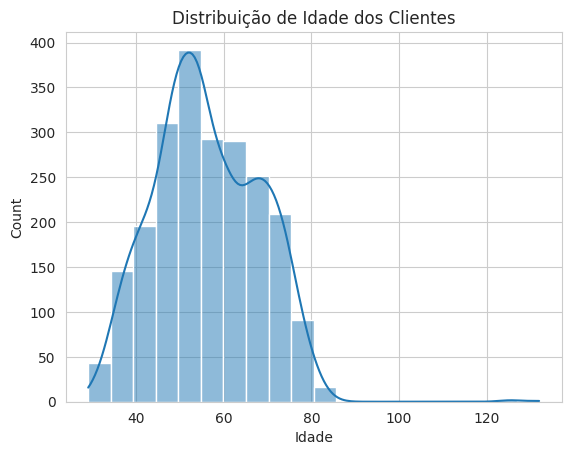

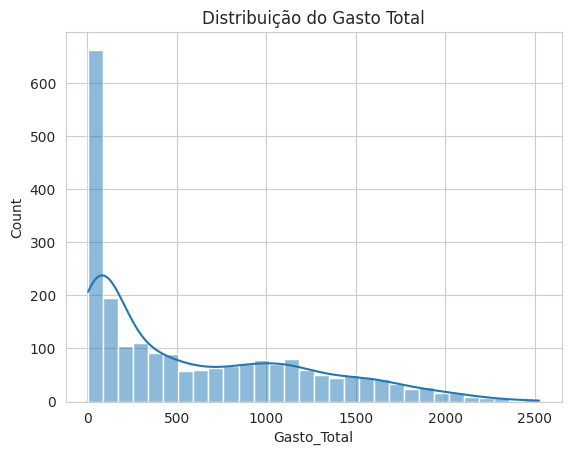

In [16]:
# Verificar distribuição de idade
sns.histplot(df_clean['Idade'], bins=20, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.show()

# Gasto Total
sns.histplot(df_clean['Gasto_Total'], bins=30, kde=True)
plt.title('Distribuição do Gasto Total')
plt.show()

### Análise Visual para Identificação de Outliers

Para aprofundar nossa análise e preparar os dados para a clusterização, é essencial identificar a presença de **outliers**. Outliers são pontos de dados que se desviam significativamente do resto do conjunto e podem distorcer os resultados de algoritmos sensíveis à distância, como o k-Means.

A ferramenta visual mais eficaz para esta tarefa é o **Boxplot**. Ele nos permite visualizar:
* A **mediana** (a linha central).
* O **intervalo interquartil (IQR)** (a "caixa", que contém 50% dos dados centrais).
* Os **"bigodes" (whiskers)**, que representam o alcance esperado dos dados.
* E, mais importante, os **pontos individuais fora dos bigodes**, que são os nossos potenciais outliers.

Vamos gerar boxplots para as nossas principais variáveis contínuas: `Renda_Anual`, `Idade` e `Gasto_Total`.

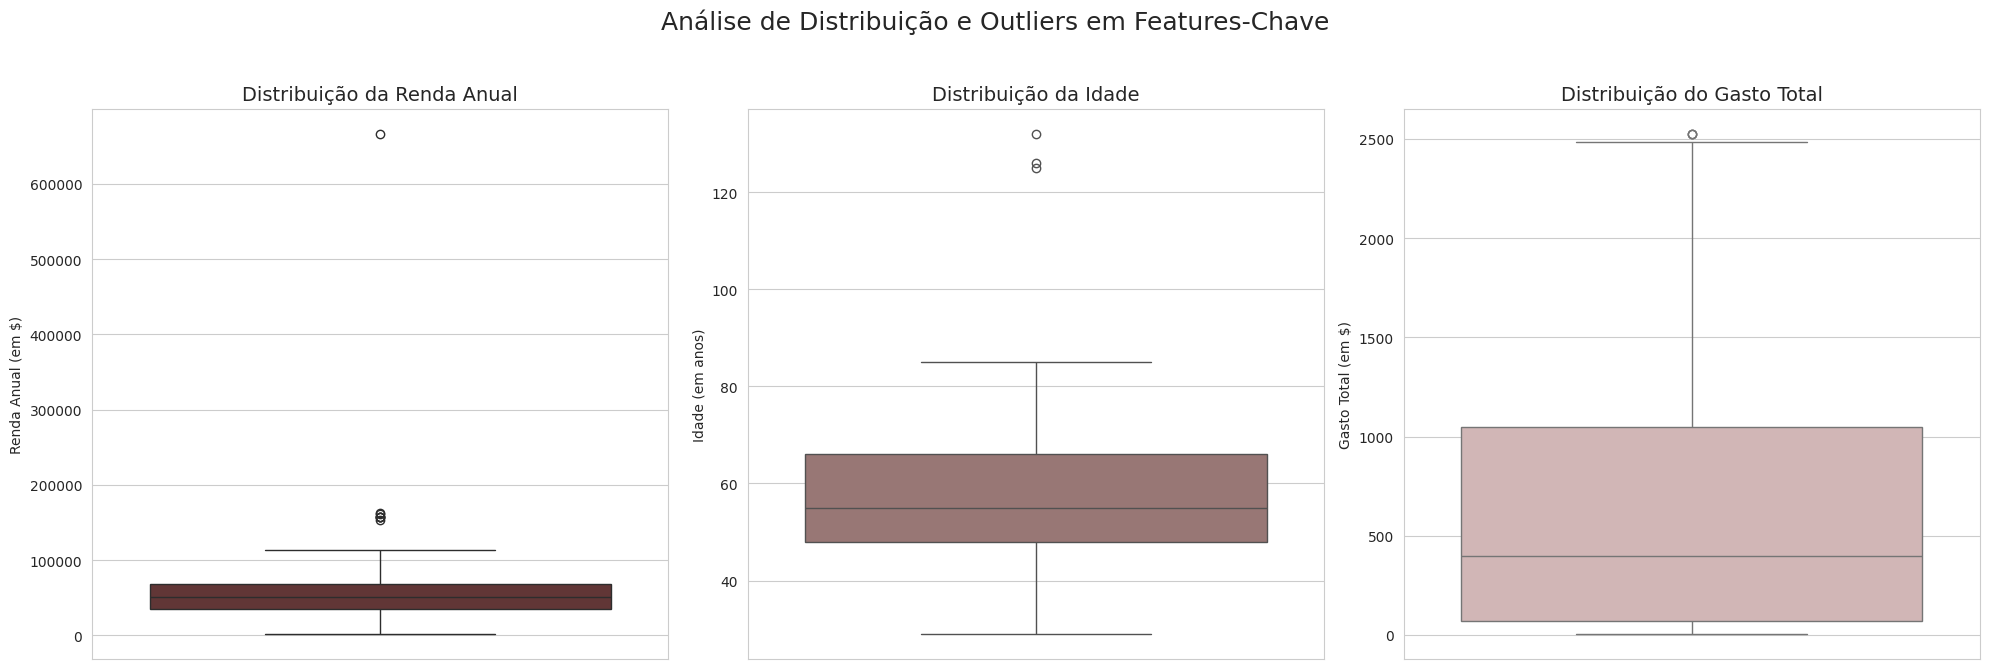

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Análise de Distribuição e Outliers em Features-Chave', fontsize=18)

# Usaremos a paleta de cores que definimos no início
PALETTE = ["#682F2F", "#9E726F", "#D6B2B1"]

# Gráfico 1: Boxplot da Renda Anual
sns.boxplot(ax=axes[0], data=df_clean, y='Renda_Anual', color=PALETTE[0])
axes[0].set_title('Distribuição da Renda Anual', fontsize=14)
axes[0].set_ylabel('Renda Anual (em $)')

# Gráfico 2: Boxplot da Idade
sns.boxplot(ax=axes[1], data=df_clean, y='Idade', color=PALETTE[1])
axes[1].set_title('Distribuição da Idade', fontsize=14)
axes[1].set_ylabel('Idade (em anos)')

# Gráfico 3: Boxplot do Gasto Total
sns.boxplot(ax=axes[2], data=df_clean, y='Gasto_Total', color=PALETTE[2])
axes[2].set_title('Distribuição do Gasto Total', fontsize=14)
axes[2].set_ylabel('Gasto Total (em $)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Remoção de Outliers

A análise visual da etapa anterior, especialmente através dos boxplots, confirmou a presença de valores extremos (outliers) nas colunas `Renda_Anual` e `Idade`. Estes pontos, embora poucos, podem distorcer significativamente o cálculo das distâncias e a formação dos clusters, levando a um modelo menos preciso e representativo da maioria dos clientes.

Para mitigar esse risco, vamos remover esses registros do nosso dataset. Adotaremos os seguintes critérios de corte:
* **Renda Anual:** Manteremos apenas clientes com renda inferior a 200.000.
* **Idade:** Manteremos apenas clientes com idade inferior a 90 anos.

Esta limpeza resultará em um conjunto de dados mais robusto e preparado para a etapa de modelagem.

In [18]:
# --- REMOÇÃO DE OUTLIERS ---

# Guardamos o número de linhas antes da remoção para verificar o impacto
linhas_antes = df_clean.shape[0]

# Filtramos o dataframe para manter apenas os clientes com Renda_Anual < 200.000 e Idade < 90
# Usamos .copy() para garantir que estamos criando um novo dataframe independente
df_sem_outliers = df_clean[(df_clean['Renda_Anual'] < 200000) & (df_clean['Idade'] < 90)].copy()

linhas_depois = df_sem_outliers.shape[0]
outliers_removidos = linhas_antes - linhas_depois

print("--- Remoção de Outliers Concluída ---")
print(f"Número de linhas original: {linhas_antes}")
print(f"Número de linhas após remover outliers: {linhas_depois}")
print(f"Total de outliers removidos: {outliers_removidos}")

# O nosso novo dataframe de trabalho agora é o 'df_sem_outliers'

--- Remoção de Outliers Concluída ---
Número de linhas original: 2240
Número de linhas após remover outliers: 2236
Total de outliers removidos: 4


### Análise de Correlação entre Features-Chave

Para finalizar nossa análise exploratória, vamos investigar a **correlação linear** entre as principais variáveis numéricas do nosso conjunto de dados. A correlação mede a força e a direção da relação entre duas variáveis.

Usaremos um **mapa de calor (heatmap)** para visualizar a matriz de correlação. Esta é uma forma gráfica e intuitiva de identificar rapidamente quais variáveis se movem juntas.

**Como interpretar o mapa de calor:**
* **Cores Quentes (próximas ao vermelho - valor próximo de +1):** Indicam uma **correlação positiva forte**. Quando uma variável aumenta, a outra tende a aumentar também. Esperamos ver isso entre `Renda_Anual` e `Gasto_Total`.
* **Cores Frias (próximas ao azul - valor próximo de -1):** Indicam uma **correlação negativa forte**. Quando uma variável aumenta, a outra tende a diminuir.
* **Cores Neutras (próximas ao branco/cinza - valor próximo de 0):** Indicam pouca ou nenhuma correlação linear.

Esta análise nos ajudará a entender as relações subjacentes no comportamento dos clientes antes de aplicarmos os algoritmos de clusterização.

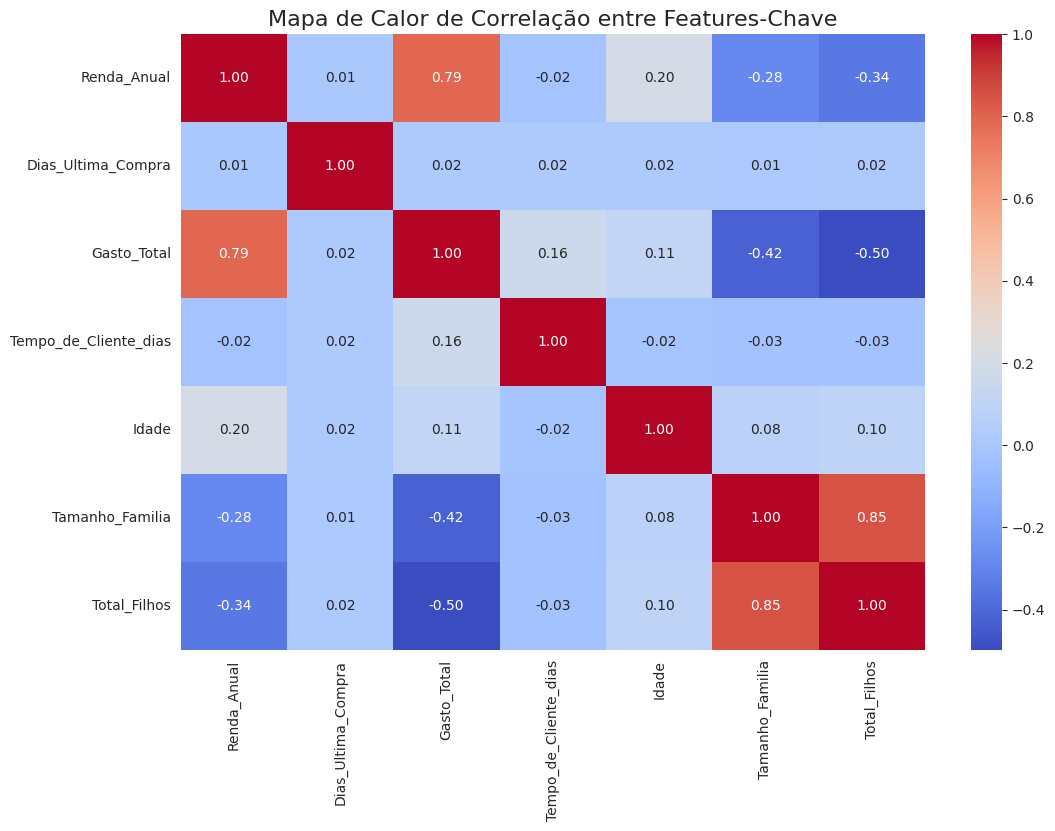

In [19]:
# --- MAPA DE CALOR DE CORRELAÇÃO ---

# Selecionando as colunas numéricas mais relevantes para a correlação
# Usamos o dataframe já sem outliers e com colunas em português
cols_para_corr = [
    'Renda_Anual', 'Dias_Ultima_Compra', 'Gasto_Total',
    'Tempo_de_Cliente_dias', 'Idade', 'Tamanho_Familia', 'Total_Filhos'
]

# Calculando a matriz de correlação
matriz_corr = df_sem_outliers[cols_para_corr].corr()

# Criando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_corr,
    annot=True,     # Mostra os valores de correlação no gráfico
    fmt=".2f",      # Formata os números para duas casas decimais
    cmap='coolwarm' # Paleta de cores: quente para positivo, frio para negativo
)
plt.title('Mapa de Calor de Correlação entre Features-Chave', fontsize=16)
plt.show()

* **Correlação Positiva Forte (Renda vs. Gasto):** A observação mais clara é a forte correlação positiva (aproximadamente **+0.79**) entre `Renda_Anual` e `Gasto_Total`. Isso confirma a hipótese intuitiva de que clientes com maior renda tendem a gastar mais. Esta será, provavelmente, uma das variáveis mais importantes para a segmentação dos nossos clientes.

* **Correlação Negativa (Filhos vs. Gasto):** Existe uma correlação negativa moderada (aproximadamente **-0.50**) entre `Total_Filhos` e `Gasto_Total`. Isso sugere que, em geral, clientes com mais filhos tendem a ter um gasto total menor nos produtos da nossa loja, possivelmente por terem outras prioridades financeiras.

* **Correlação Moderada (Idade e Tempo de Cliente):** A `Idade` e o `Tempo_de_Cliente_dias` também mostram uma correlação positiva com o `Gasto_Total`. Isso indica que clientes mais velhos e mais leais (com mais tempo de casa) tendem a gastar mais.

* **Pouca Correlação (Recência):** A variável `Dias_Ultima_Compra` (Recência) parece ter uma correlação muito fraca com as outras variáveis, sugerindo que o tempo desde a última compra não está fortemente ligado de forma linear à renda ou ao gasto total nesta visão geral.

# Pré-processamento

### Label Encoding
Converteremos as variáveis categóricas remanescentes (`Escolaridade` e `Estado_Civil`) em representações numéricas, pois os algoritmos de clusterização não processam texto.

In [20]:
# --- PASSO 4: EXECUÇÃO DO ENCODING E SCALING ---

# Criamos uma cópia do dataframe já limpo para esta etapa final
df_processed = df_sem_outliers.copy()

# 1. ENCODING DE VARIÁVEIS CATEGÓRICAS
# Seleciona as colunas de texto (tipo 'object')
categorical_cols = df_processed.select_dtypes(include='object').columns

print("--- Codificando as seguintes colunas categóricas: ---")
print(categorical_cols)

# Aplica o LabelEncoder para transformar texto em números
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

--- Codificando as seguintes colunas categóricas: ---
Index(['Escolaridade', 'Estado_Civil'], dtype='object')


### Normalização

Padronizar todas as colunas para que tenham média 0 e desvio padrão 1. Isso evita que variáveis com valores grandes (como Renda_Anual) dominem o processo de clusterização.

In [21]:
# 2. NORMALIZAÇÃO (STANDARD SCALING)
# Instancia o Scaler
scaler = StandardScaler()

# Treina o scaler e transforma o dataframe
scaled_features = scaler.fit_transform(df_processed)

# Converte o array de volta para um dataframe do pandas com os nomes das colunas
# Este é o nosso dataframe final e pronto para a modelagem!
df_ready = pd.DataFrame(scaled_features, columns=df_processed.columns)

In [22]:
# --- RESULTADO DA ETAPA ---
print("\n--- Dataset 100% pronto para a clusterização ---")
print("Todas as features são numéricas e estão na mesma escala.")
display(df_ready.head())


--- Dataset 100% pronto para a clusterização ---
Todas as features são numéricas e estão na mesma escala.


,Escolaridade,Estado_Civil,Renda_Anual,Dias_Ultima_Compra,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Ouro,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Reclamou_2_Anos,Aceitou_Ultima_Campanha,Idade,Gasto_Total,Tempo_de_Cliente_dias,Total_Filhos,Possui_Filhos,Tamanho_Familia
0,-0.89438,1.347635,0.288947,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,...,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,1.529793,-1.264308,-1.584362,-1.758810
1,-0.89438,1.347635,-0.262003,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,...,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,-1.191143,1.395139,0.631169,0.445618
2,-0.89438,-0.742041,0.918423,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,...,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-0.206659,-1.264308,-1.584362,-0.656596
3,-0.89438,-0.742041,-1.182183,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,...,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,-1.062517,0.065416,0.631169,0.445618
4,0.57070,-0.742041,0.296187,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,...,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,-0.953679,0.065416,0.631169,0.445618


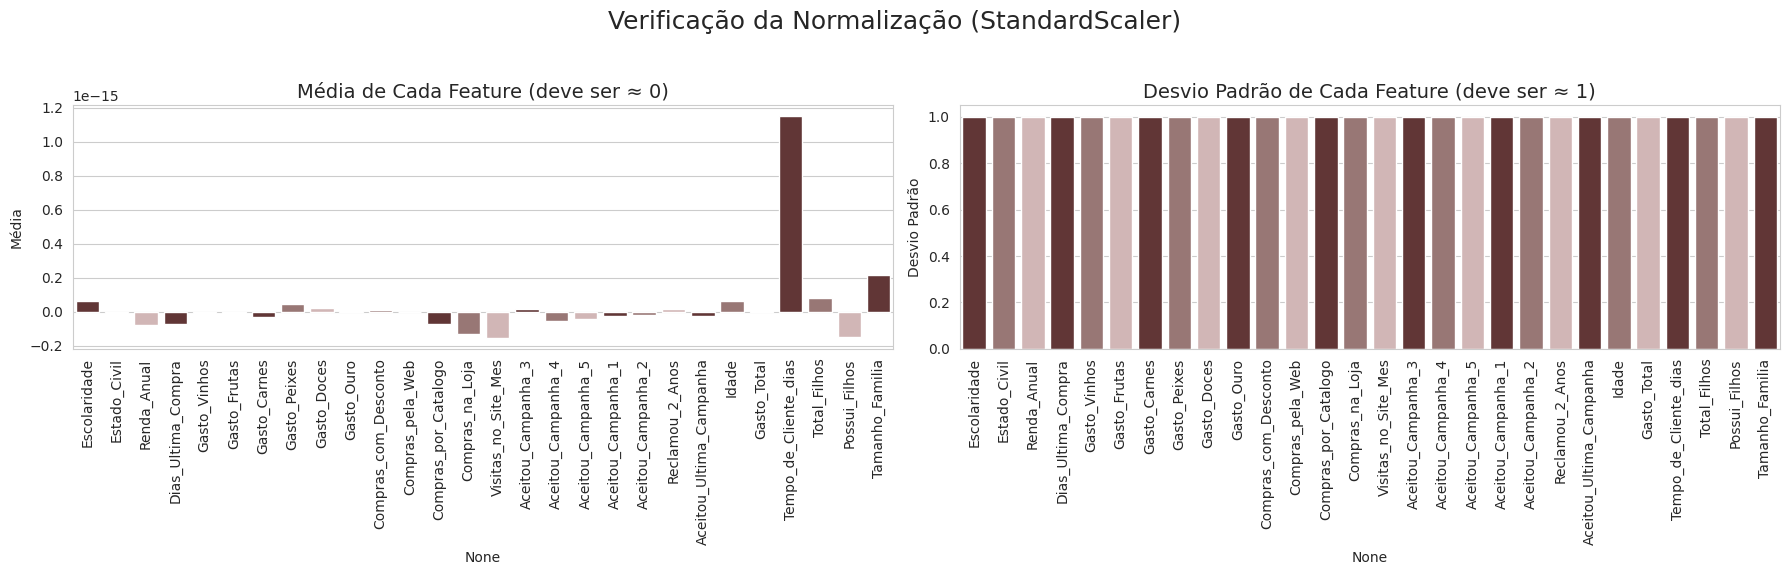


--- Média de cada feature (arredondada para 5 casas decimais): ---
Escolaridade               0.0
Estado_Civil              -0.0
Renda_Anual               -0.0
Dias_Ultima_Compra        -0.0
Gasto_Vinhos              -0.0
Gasto_Frutas              -0.0
Gasto_Carnes              -0.0
Gasto_Peixes               0.0
Gasto_Doces                0.0
Gasto_Ouro                 0.0
Compras_com_Desconto       0.0
Compras_pela_Web           0.0
Compras_por_Catalogo      -0.0
Compras_na_Loja           -0.0
Visitas_no_Site_Mes       -0.0
Aceitou_Campanha_3         0.0
Aceitou_Campanha_4        -0.0
Aceitou_Campanha_5        -0.0
Aceitou_Campanha_1        -0.0
Aceitou_Campanha_2        -0.0
Reclamou_2_Anos            0.0
Aceitou_Ultima_Campanha   -0.0
Idade                      0.0
Gasto_Total                0.0
Tempo_de_Cliente_dias      0.0
Total_Filhos               0.0
Possui_Filhos             -0.0
Tamanho_Familia            0.0
dtype: float64

--- Desvio Padrão de cada feature (arredondado p

In [23]:
# --- VERIFICAÇÃO DO STANDARDSCALER ---

# Calculando a média e o desvio padrão de cada coluna no dataframe normalizado
means = df_ready.mean()
stds = df_ready.std()

# Criando a figura para os gráficos de verificação
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Verificação da Normalização (StandardScaler)', fontsize=18)

# Gráfico 1: Média das Features
sns.barplot(ax=axes[0], x=means.index, y=means.values, palette=PALETTE)
axes[0].set_title('Média de Cada Feature (deve ser ≈ 0)', fontsize=14)
axes[0].set_ylabel('Média')
axes[0].tick_params(axis='x', rotation=90) # Rotaciona os nomes das colunas para não sobrepor

# Gráfico 2: Desvio Padrão das Features
sns.barplot(ax=axes[1], x=stds.index, y=stds.values, palette=PALETTE)
axes[1].set_title('Desvio Padrão de Cada Feature (deve ser ≈ 1)', fontsize=14)
axes[1].set_ylabel('Desvio Padrão')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Exibindo os valores exatos para confirmação numérica
print("\n--- Média de cada feature (arredondada para 5 casas decimais): ---")
print(round(means, 5))
print("\n--- Desvio Padrão de cada feature (arredondado para 5 casas decimais): ---")
print(round(stds, 5))

### Análise da Distância do k-ésimo Vizinho para Determinar `eps` no DBSCAN

Para ajudar a escolher um valor adequado para o parâmetro `eps` do DBSCAN, podemos analisar a distância de cada ponto ao seu k-ésimo vizinho mais próximo. Um gráfico dessas distâncias, ordenadas de forma crescente, pode revelar um "cotovelo" que sugere um bom valor para `eps`.

Vamos calcular a distância para o 5º vizinho mais próximo (`min_samples=5`) para cada ponto no nosso dataframe `df_ready` e visualizar essas distâncias.

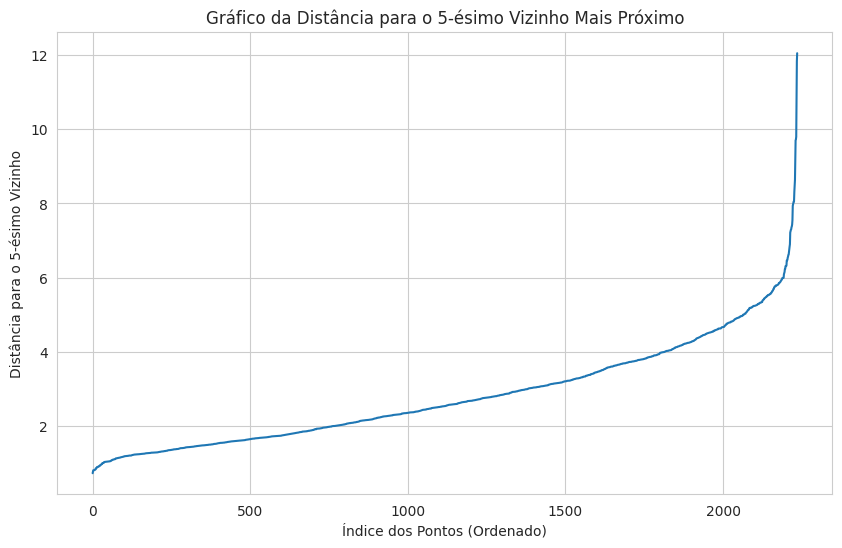

Análise da distância para o 5-ésimo vizinho mais próximo concluída.
Procure por um 'cotovelo' no gráfico para identificar um valor potencial para 'eps'.


In [24]:
# Importa a função nearest_neighbors do sklearn para calcular distâncias
from sklearn.neighbors import NearestNeighbors

# Define o número de vizinhos (geralmente igual ao min_samples desejado)
n_neighbors = 5

# Cria uma instância de NearestNeighbors
# metric='euclidean' é a métrica de distância padrão usada pelo DBSCAN
neigh = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')

# Encontra os k vizinhos mais próximos para cada ponto
neighbors_fit = neigh.fit(df_ready)

# Retorna as distâncias e os índices dos vizinhos
# As distâncias são ordenadas pela distância do ponto de consulta
distances, indices = neighbors_fit.kneighbors(df_ready)

# Ordena as distâncias para o k-ésimo vizinho mais próximo em ordem crescente
# A coluna n_neighbors-1 contém a distância para o k-ésimo vizinho (índice 0 é o ponto ele mesmo)
distances = np.sort(distances[:, n_neighbors-1], axis=0)

# Plota o gráfico da distância do k-ésimo vizinho
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'Gráfico da Distância para o {n_neighbors}-ésimo Vizinho Mais Próximo')
plt.xlabel('Índice dos Pontos (Ordenado)')
plt.ylabel(f'Distância para o {n_neighbors}-ésimo Vizinho')
plt.grid(True)
plt.show()

print(f"Análise da distância para o {n_neighbors}-ésimo vizinho mais próximo concluída.")
print("Procure por um 'cotovelo' no gráfico para identificar um valor potencial para 'eps'.")

In [25]:
# Re-aplicação do DBSCAN com parâmetros ajustados

# Cria uma nova instância do modelo DBSCAN com o novo valor de eps
dbscan_tuned = DBSCAN(eps=6, min_samples=5)

# Aplica o DBSCAN ao dataframe pronto para modelagem
clusters_dbscan_tuned = dbscan_tuned.fit_predict(df_ready)

# Adiciona os novos rótulos dos clusters ao dataframe original (sem outliers)
# Vamos criar uma nova coluna para não sobrescrever os resultados anteriores
df_sem_outliers['Cluster_DBSCAN_eps6'] = clusters_dbscan_tuned

print("--- DBSCAN Aplicado com eps=6 e min_samples=5 ---")
# O rótulo -1 ainda representa ruído
print(f"Número de clusters encontrados (incluindo ruído - rótulo -1): {len(np.unique(clusters_dbscan_tuned))}")
print("\nContagem de membros por cluster:")
print(df_sem_outliers['Cluster_DBSCAN_eps6'].value_counts())

--- DBSCAN Aplicado com eps=6 e min_samples=5 ---
Número de clusters encontrados (incluindo ruído - rótulo -1): 5

Contagem de membros por cluster:
Cluster_DBSCAN_eps6
 0    2172
-1      26
 1      19
 3      10
 2       9
Name: count, dtype: int64


In [26]:
# 3. Análise dos Clusters do DBSCAN

# Antes de agrupar, garantir que as colunas categóricas em df_sem_outliers sejam numéricas
# Aplicar Label Encoding nas colunas 'Escolaridade' e 'Estado_Civil' em df_sem_outliers
categorical_cols_sem_outliers = ['Escolaridade', 'Estado_Civil']
for col in categorical_cols_sem_outliers:
    # Verificar se a coluna ainda é object antes de encodar
    if df_sem_outliers[col].dtype == 'object':
        le = LabelEncoder()
        df_sem_outliers[col] = le.fit_transform(df_sem_outliers[col])


# Agrupa o dataframe original (sem outliers, agora com colunas encodadas) pelos rótulos de cluster do DBSCAN (eps=6)
# e calcula a média das features para cada cluster.
# Excluímos a coluna do cluster para não incluir ela no cálculo da média.
cluster_analysis_dbscan = df_sem_outliers.groupby('Cluster_DBSCAN_eps6').mean()

print("--- Análise das Características dos Clusters DBSCAN (eps=6) ---")
print("Média das features por Cluster:")
display(cluster_analysis_dbscan)

# Opcional: Para uma comparação mais fácil, podemos transpor o resultado
# display(cluster_analysis_dbscan.T)

--- Análise das Características dos Clusters DBSCAN (eps=6) ---
Média das features por Cluster:


,Escolaridade,Estado_Civil,Renda_Anual,Dias_Ultima_Compra,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Ouro,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Reclamou_2_Anos,Aceitou_Ultima_Campanha,Idade,Gasto_Total,Tempo_de_Cliente_dias,Total_Filhos,Possui_Filhos,Tamanho_Familia
Cluster_DBSCAN_eps6,,,,,,,,,,,,,,,,,,,,,
-1,0.807692,0.538462,66628.730769,42.538462,340.423077,19.076923,532.576923,31.423077,48.807692,83.538462,...,0.230769,0.423077,0.038462,0.461538,52.000000,1055.846154,4344.576923,0.576923,0.384615,2.038462
0,0.611878,0.354052,51668.368785,49.163444,298.317219,26.460866,162.912983,37.653775,26.931860,43.595764,...,0.059392,0.000000,0.000000,0.142265,56.114180,595.872468,4377.949816,0.956722,0.720074,2.602670
1,0.368421,0.315789,43694.263158,50.473684,157.789474,25.000000,92.842105,26.105263,13.526316,25.526316,...,0.000000,0.000000,1.000000,0.105263,58.052632,340.789474,4443.157895,1.263158,0.842105,2.947368
2,0.555556,0.111111,59599.444444,52.000000,978.777778,8.222222,135.888889,24.333333,9.222222,46.666667,...,0.222222,1.000000,0.000000,0.444444,56.222222,1203.111111,4543.888889,0.777778,0.777778,2.666667
3,0.300000,0.400000,84341.500000,50.800000,1142.600000,23.500000,269.400000,61.500000,44.700000,57.900000,...,0.700000,1.000000,0.000000,0.700000,60.300000,1599.600000,4375.600000,0.200000,0.200000,1.800000


## Visualização dos Clusters com Redução de Dimensionalidade

Após aplicar os algoritmos de clusterização, a visualização dos resultados em um espaço de menor dimensão é crucial para entender como os clusters se separam e quais características os definem. Utilizaremos duas técnicas principais de redução de dimensionalidade:

1.  **PCA (Principal Component Analysis):** Uma técnica linear que busca os componentes de maior variância nos dados. É útil para capturar a estrutura global e a separação linear dos clusters.
2.  **t-SNE (t-Distributed Stochastic Neighbor Embedding):** Uma técnica não linear que é particularmente eficaz em preservar as distâncias locais entre os pontos, tornando-a excelente para visualizar a estrutura interna dos clusters e a proximidade entre eles.

Vamos aplicar essas técnicas ao nosso dataframe `df_ready` (o dataset padronizado e pronto para modelagem) e, em seguida, plotar os resultados colorindo os pontos de acordo com os rótulos de cluster obtidos pelo K-Means, Hierárquico e DBSCAN.

### 1. Redução de Dimensionalidade com PCA

In [27]:
# --- Redução de Dimensionalidade com PCA ---

# Instancia o PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)

# Aplica o PCA ao dataframe pronto para modelagem
principal_components = pca.fit_transform(df_ready)

# Cria um novo dataframe com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PCA Componente 1', 'PCA Componente 2'])

print("--- PCA Aplicado ---")
print("Visualizando o dataframe com os dois primeiros componentes principais:")
display(df_pca.head())

--- PCA Aplicado ---
Visualizando o dataframe com os dois primeiros componentes principais:


,PCA Componente 1,PCA Componente 2
0,4.798362,0.060977
1,-2.676531,-0.580347
2,2.122174,-0.577682
3,-2.660040,-0.945250
4,-0.638332,0.647135


### 2. Redução de Dimensionalidade com t-SNE

In [28]:
# --- Redução de Dimensionalidade com t-SNE ---

# Instancia o t-SNE para reduzir para 2 componentes
# Recomenda-se executar t-SNE em dados já reduzidos pelo PCA para datasets maiores
# ou diretamente no dataframe escalado para datasets menores como este.
# 'n_components' é o número de dimensões de saída (geralmente 2 ou 3)
# 'random_state' para reprodutibilidade
# 'perplexity' e 'n_iter' são parâmetros importantes que podem precisar de ajuste
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)

# Aplica o t-SNE ao dataframe pronto para modelagem
tsne_results = tsne.fit_transform(df_ready)

# Cria um novo dataframe com os resultados do t-SNE
df_tsne = pd.DataFrame(data=tsne_results, columns=['t-SNE Componente 1', 't-SNE Componente 2'])


print("--- t-SNE Aplicado ---")
print("Visualizando o dataframe com os resultados do t-SNE:")
display(df_tsne.head())

--- t-SNE Aplicado ---
Visualizando o dataframe com os resultados do t-SNE:


,t-SNE Componente 1,t-SNE Componente 2
0,8.505582,-3.962238
1,-6.706036,-3.876202
2,4.152815,-2.177200
3,-5.737738,2.760581
4,-0.776356,4.329112
